In [238]:
%matplotlib inline
import numpy as np
import pandas as pd
from plotnine import *
import math
import matplotlib.pyplot as plt

# Step 1

In [8]:
xs = np.random.randint(0, 100, 50)
ys = np.random.randint(0, 100, 50)

In [9]:
df = pd.DataFrame({"x":xs, "y":ys})

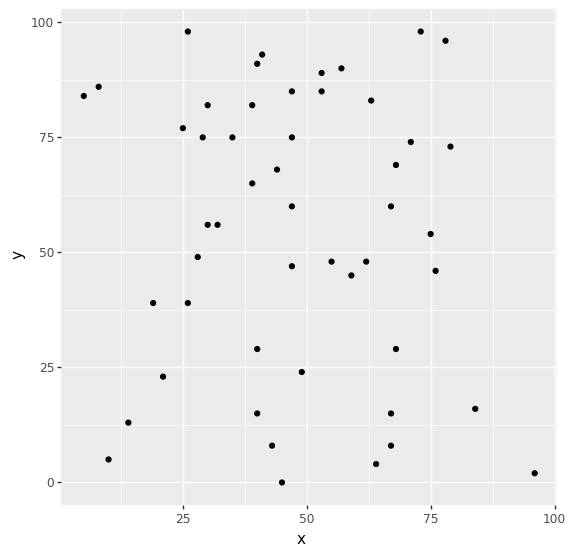

<ggplot: (112061253982)>

In [10]:
ggplot(df, aes(x="x", y="y")) + geom_point() + theme(aspect_ratio=1)

In [11]:
def distance(xs, ys, i, j) :
    return np.sqrt((xs[i] - xs[j]) ** 2 + 
                   (ys[i] - ys[j]) ** 2)

In [12]:
tour = np.arange(len(xs))
tour

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [13]:
def tour_distance(t, xs, ys):
    d = 0
    s = len(t)
    for i in range(s):
        d += distance(xs, ys, t[i], t[(i + 1) % s])
    return d

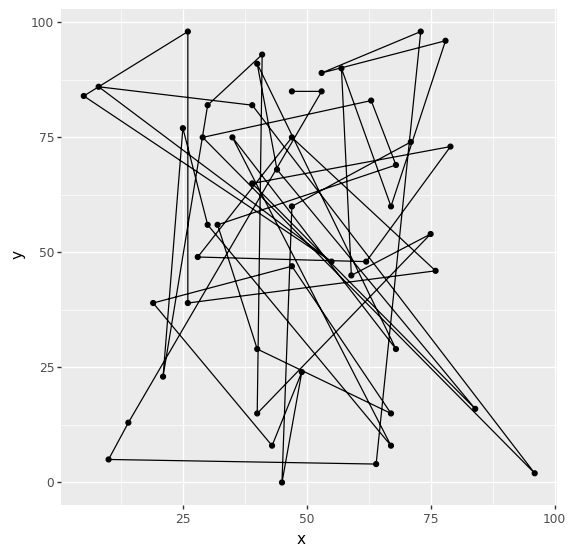

<ggplot: (112063436295)>

In [14]:
ggplot(df, aes(x="x", y="y")) + geom_point() + geom_path() + theme(aspect_ratio=1)

In [15]:
def swap(t, i, j):
    t[i], t[j] = t[j], t[i]

In [321]:
class Map():
    
    def __init__(self, size, x, y, z):
        #self.xs = np.random.randint(1, 99, size)
        #self.ys = np.random.randint(1, 99, size)
        self.size = size
        self.xs = x
        self.ys = y
        self.zs = z
        
    def distance(self, i, j):
        return np.sqrt((self.xs[i] - self.xs[j]) ** 2 + 
                       (self.ys[i] - self.ys[j]) ** 2)        

class Tour():
    
    def __init__(self, m):
        self.m = m
        self.cities = np.arange(self.m.size)
        np.random.shuffle(self.cities)
        
    def clone(self):
        c = Tour(self.m)
        c.cities = np.copy(self.cities)
        return c
    
    def distance(self):
        d = 0
        for i in range(self.m.size):
            d += self.m.distance(self.cities[i], self.cities[(i + 1) % self.m.size])
        return d        
    
    def swap(self, i, j):
        self.cities[i], self.cities[j] = self.cities[j], self.cities[i]
        
    def plot(self):
        df = pd.DataFrame({"x":self.m.xs, 
                           "y":self.m.ys,
                           "z":self.m.zs})
        df = df.reindex(self.cities)
        ax = plt.axes(projection='3d')
        return plt.plot(df['x'], df['y'], df['z'])
    #ggplot(df, aes(x="x", y="y", z="z")) + geom_point() \
    #+ geom_path() + theme(aspect_ratio=1) + xlim(0, 100) + ylim(0, 100)
    

    def mutate(self):
        i, j = np.random.randint(0, self.m.size, 2)
        self.swap(i, j)
    
    def crossover(self, other):
        i, j = np.random.randint(0, self.m.size, 2)
        a = min(i, j)
        b = max(i, j)
        newa = -1 * np.ones(self.m.size, dtype=np.int)
        newb = -1 * np.ones(self.m.size, dtype=np.int)
        for x in range(a, b + 1):
            newa[x] = other.cities[x]
            newb[x] = self.cities[x]
        for t, v in ((newa, self), (newb, other)):
            c = 0
            i = 0
            while c < v.m.size:
                if t[c] != -1:
                    c += 1
                else:
                    if v.cities[i] not in t:
                        t[c] = v.cities[i]
                        c += 1
                    i += 1
        self.cities = newa
        other.cities = newb
        
    def cycleCrossover(self, other):
        cycle,pos = 0,0
        newa = -1 * np.ones(self.m.size, dtype=np.int)
        newb = -1 * np.ones(self.m.size, dtype=np.int)
        while len(np.where(newa==-1)[0]) > 0:
            count = np.where(newa==-1)[0][0]
            cycleList = []
            cycleList.append(self.cities[count])
            while True:
                if cycleList[0] == other.cities[count]:
                    break
                cycleList.append(other.cities[count])
                for i in range(len(self.cities)):
                    if self.cities[i] == other.cities[count]:
                        count = i
                        break
            for i in range(len(self.cities)):
                for x in cycleList:
                    if cycle % 2 == 0:
                        if x == self.cities[i]:
                            newa[i] = x
                        if x == other.cities[i]:
                            newb[i] = x
                    else:
                        if x == self.cities[i]:
                            newb[i] = x
                        if x == other.cities[i]:
                            newa[i] = x
            cycle+=1
        self.cities = newa
        other.cities = newb
        
    def interchange(self, i, j):
        self.cities[i:j+1] = self.cities[i:j+1][::-1]

In [73]:
newa = -1 * np.ones(9, dtype=np.int)
count = np.where(newa-1)
count[0][0]

0

## Step 1.1

In [130]:
world = Map(50)
t = Tour(world)
t2 = t.clone()

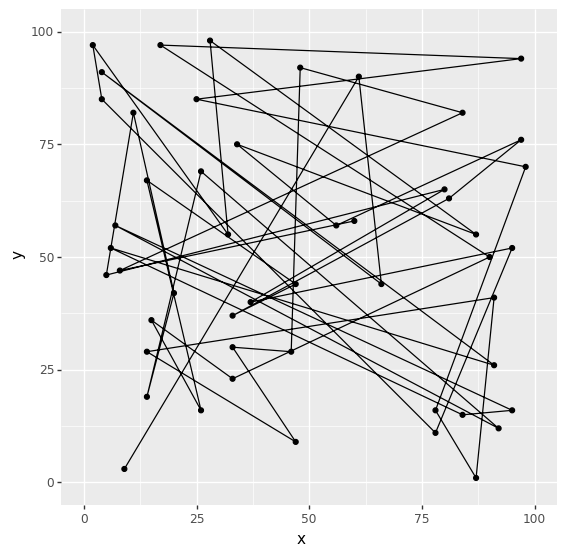

<ggplot: (111946794225)>

In [107]:
t.plot()

In [79]:
def descent(t):
    finished = False
    while not finished:
        d = t.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = t.m.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                t.swap(i, j)
                od = t.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                t.swap(i, j)
        if not finished:
            t.swap(best_i, best_j)
            print(t.distance())

In [21]:
descent(t2)

2413.295237979677
2252.5735670361328
2100.203213817811
1952.157841614671
1815.6006275333468
1718.727834445696
1633.2630641645646
1563.971183216792
1499.97343885508
1418.7430220672704
1366.8747137093965
1326.2753122738384
1300.23467333979
1260.444556346866
1231.244423731447
1203.571103865218
1174.2489418734779
1122.1516084239236
1076.0710847352782
1053.2400004572642
1035.7482255335528
1018.9730849576086
1004.8609222973636
993.9078692389272
983.67099834783
973.5074901841427
963.7515077532424
954.9577995748249
946.5007303849355
939.7011414058171
933.6962657806176
919.4447768825182
914.5408086964235
907.4763889847047
900.785666910346
884.446810657605
872.8950833206154
862.06101385087
852.6020091806577
850.6122716656018
848.6754881614952
838.0073156373066
821.144987545543
819.7383252223995
819.2512619301372
818.7794520532088
816.9299545646645
816.9159185292715
812.9921526840545
807.6650012437874
803.9715449650118
786.363123728129
776.6460085692909
766.9323064991496
760.0010342511123
755.314

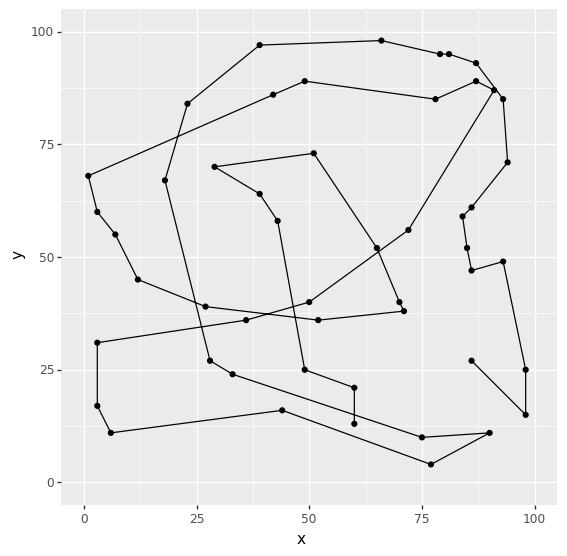

<ggplot: (126702474635)>

In [15]:
t2.plot()

In [16]:
def annealing(t, temp, decay, stop):
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.m.size, 2)
        t.swap(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                t.swap(i, j)
        temp *= decay

In [17]:
t3 = t.clone()

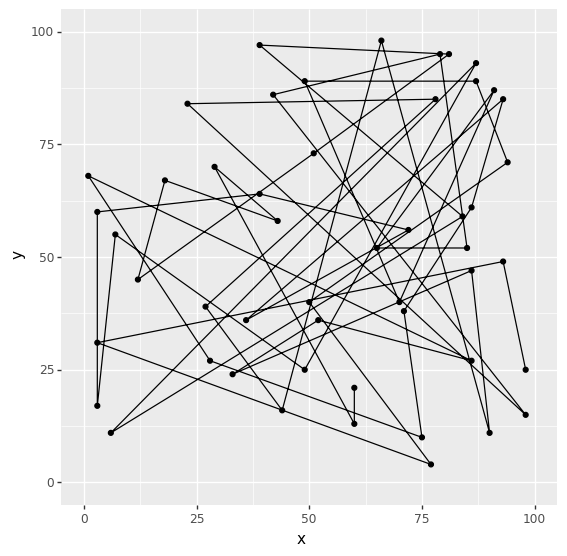

<ggplot: (126702595949)>

In [18]:
t3.plot()

In [19]:
annealing(t3, 5000, 0.999, 0.00001)

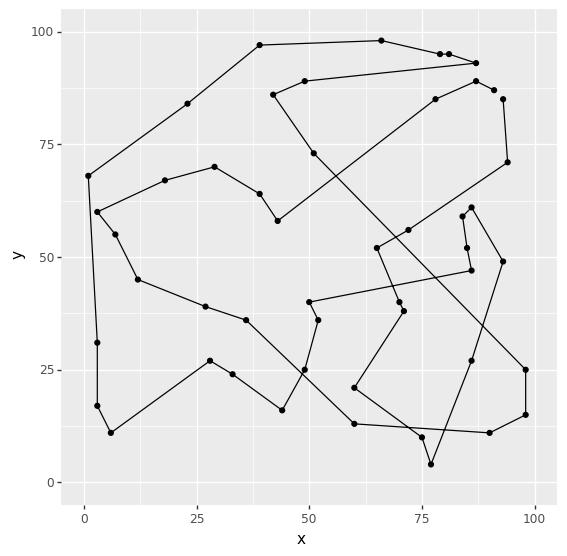

<ggplot: (126702479457)>

In [20]:
t3.plot()

## Step 1.2

In [43]:
world = Map(50)
t = Tour(world)
t2 = t.clone()

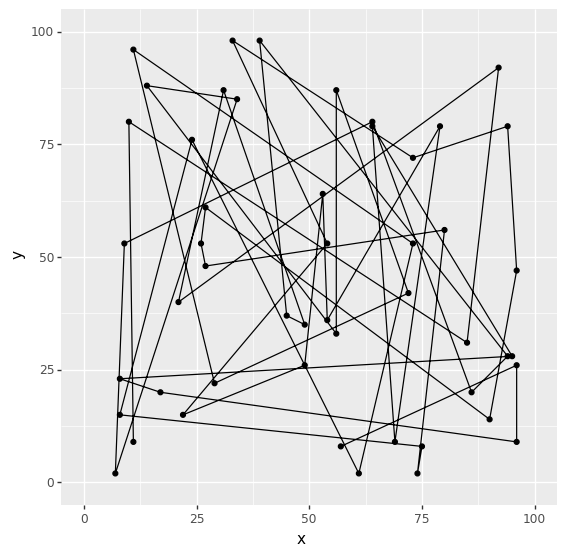

<ggplot: (126703937943)>

In [50]:
t.plot()

In [44]:
def descent(t):
    finished = False
    while not finished:
        d = t.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = t.m.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                t.interchange(i,j)
                t.swap(i, j)
                od = t.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                t.interchange(i,j)
                t.swap(i, j)
        if not finished:
            t.interchange(best_i,best_j)
            t.swap(best_i, best_j)            
            print(t.distance())

In [282]:
def annealing(t, temp, decay, stop):
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.m.size, 2)
        t.swap(i, j)
        t.interchange(i,j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                t.interchange(i,j)
                t.swap(i, j)
        temp *= decay

In [46]:
descent(t2)

2432.0747316425786
2306.364093934716
2190.556694534498
2075.90369310822
1965.356613206823
1855.4948538632202
1754.374175936701
1660.955241122707
1567.7237144672895
1481.1280664633468
1405.345888600799
1320.9185755701192
1243.3400400057044
1177.2319658530307
1121.4467744326564
1067.7361120058035
1015.3265606136067
968.512457036458
937.0292724757327
910.7546074281279
878.6724559150983
852.8726942914558
829.6276883513764
804.8785288192726
783.0587777253604
764.9105486885903
736.9909599436164
720.7922395965032
706.1016529081938
692.783470366557
681.4343925408385
673.1206876593477
658.1204714007716
647.1413072551471
639.2485867420295
632.143419280473
619.3437213940473
614.9631252009182
612.7550072870703
612.2984412699276


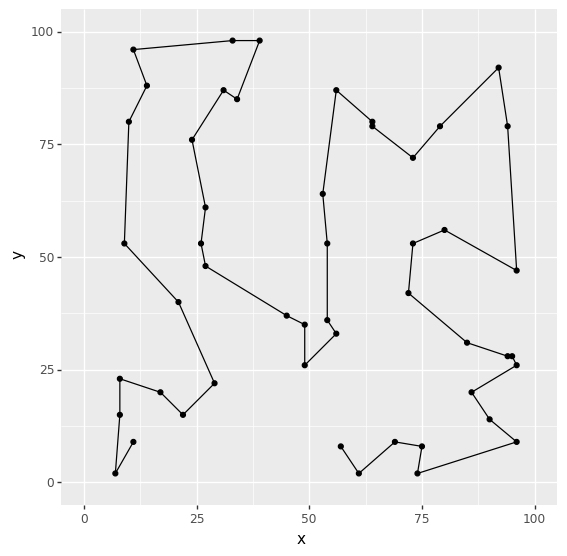

<ggplot: (126702470376)>

In [47]:
t2.plot()

In [48]:
t3 = t.clone()
annealing(t3, 5000, 0.999, 0.00001)

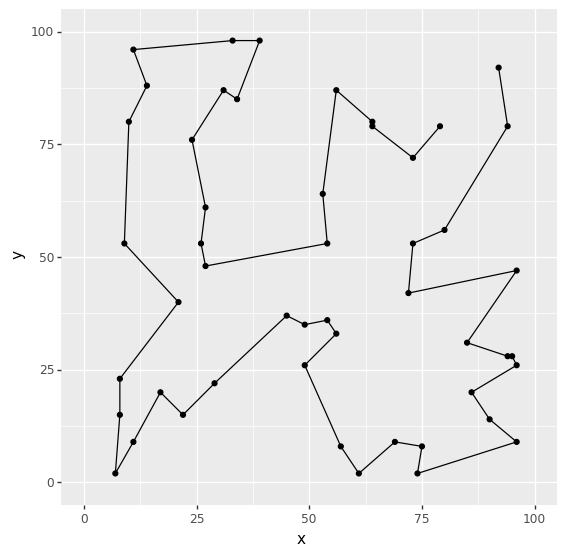

<ggplot: (126702595024)>

In [49]:
t3.plot()

# Reflection:

The quality changes a lot from the original plot to where it is after using the descent and annealing functions. Both of them effectively optimized the distance taken over the course of the tour by quite a bit and the plot shows this in how much more ordered it becomes. For both of them it ended up taking around 30 seconds to a minute to completely finish running the functions.

# Step 2

In [303]:
psize = 200
size = 50
iter = 100
mutation_rate = 0.15

world = Map(size)
population = []
for p in range(psize):
    population.append(Tour(world))

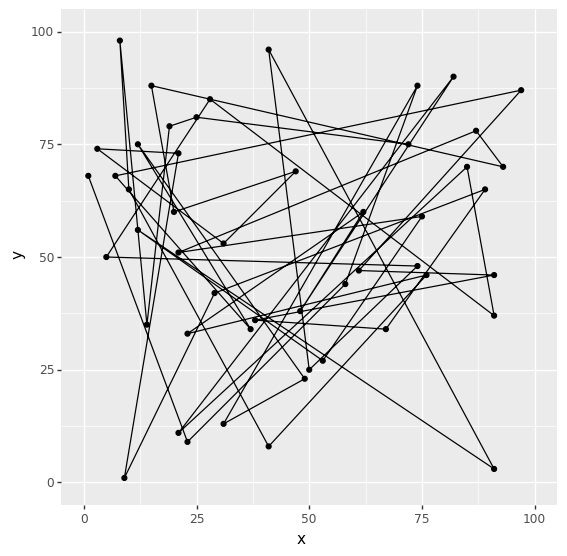

<ggplot: (112063527485)>

In [304]:
population[2].plot()

In [305]:
def evoalg(pop, iterations):
    #bestever
    
    for i in range(iterations):
        
        # evaluate (use the distance function)
        
        # select (Tournament)
        newpop = []
        for p in range(len(pop)):
            a, b = np.random.randint(0, len(pop), 2)
            if pop[a].distance() < pop[b].distance():
                newpop.append(pop[a].clone())
            else:
                newpop.append(pop[b].clone())
        pop = newpop
        
        # crossover
        for p in range(0, len(pop), 2):
            pop[p].cycleCrossover(pop[p + 1])
        
        # mutation
        for p in range(len(pop)):
            if np.random.random() < mutation_rate:
                pop[p].mutate()

        best = pop[0].distance()
        bestn = 0
        ave = best
        for m in range(1, len(pop)):
            ave += pop[m].distance()
            if pop[m].distance() < best:
                best = pop[m].distance()
                bestn = m
        ave /= len(pop)
        print(i, best, ave)      

    return bestn, pop

## cycle crossover

In [306]:
b, pop = evoalg(population, iter)

0 2106.5707815780556 2454.464835452746
1 2074.4024320869767 2430.1690664901653
2 2074.4024320869767 2406.098305921852
3 2074.4024320869767 2369.9185924311805
4 2024.646676107043 2361.631838522478
5 2056.8960343946246 2351.374867518648
6 1906.3058316986928 2343.490237990053
7 1922.174341611213 2345.4246596845305
8 1958.2735479537646 2318.704637113422
9 1982.7378542720928 2301.923027921597
10 2018.039511906948 2321.2433799137225
11 1970.7491788811099 2317.138472220471
12 1974.3747433604824 2307.653307543768
13 2041.2967646794086 2315.5273829547073
14 1973.1716110529258 2290.8182793799338
15 1961.923800249619 2255.9821767081526
16 1935.6341281674177 2236.7931063478654
17 1927.1809823882652 2222.514424627935
18 1821.646034478696 2207.804201394838
19 1840.164828218365 2182.0356605134402
20 1828.6025779093015 2171.953970940203
21 1765.4461451828752 2176.5127301295065
22 1765.4461451828752 2140.438685947525
23 1765.4461451828752 2120.2041588296574
24 1752.3926718320974 2095.7909384986388
25 1

## crossover

In [135]:
b, pop = evoalg(population, iter)

0 2407.841811147208 2793.7354898527137
1 2162.395411978352 2763.1255610402436
2 2256.8989665951476 2752.8111130307425
3 2397.9407771741535 2736.4179649229163
4 2292.6147886104577 2722.007475157098
5 2263.6206137945005 2726.3293510250123
6 2243.9966072387556 2695.1015872832063
7 2293.94975244705 2684.3096710167656
8 2283.1104960993307 2669.000270281445
9 2220.2366972141076 2643.754875067744
10 2159.087535763209 2636.607050273012
11 2184.7384444017653 2613.824325455181
12 2134.7568320865244 2583.203586872813
13 2172.0303611961544 2542.6112782918813
14 2169.507082101289 2511.5770602023313
15 2167.319893762591 2466.128406903369
16 2038.3460182660683 2444.3846005272376
17 2083.6496859591443 2411.0751564404654
18 2000.0383703414868 2376.6699337953514
19 1932.432834026982 2335.3944508976906
20 1982.8529752584889 2302.7208855683807
21 1883.9248311864387 2252.708716372805
22 1847.2590862854747 2209.1245807754667
23 1871.3090662506072 2183.685528427677
24 1785.1485882118575 2148.2260094374788
25

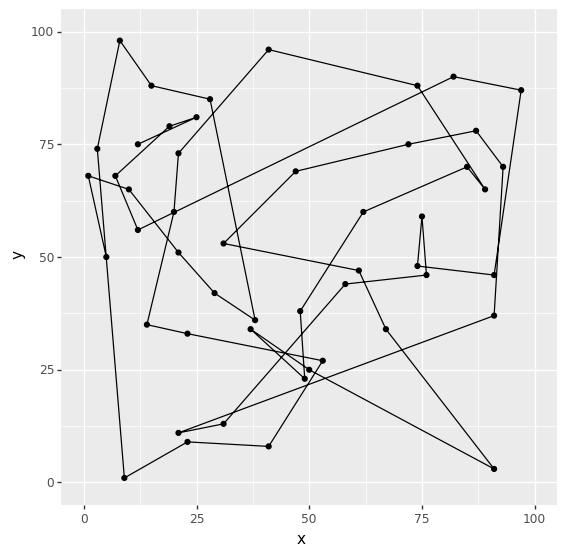

<ggplot: (111939890610)>

In [307]:
pop[2].plot()

# Reflection:

While the algorithm did effectively reduce the distance traveled during the tour it took far more time to completely run this function, and it also wasn't able to optimize the distance as far as the functions used in Step 1. Presumably with more time and iterations this would be just as good or better as the other functions but for now it ended up being slower and worse at optimizing the distance of this Tour.

# Step 3

In [159]:
df = pd.read_csv("CSV Files/starData.csv")
df = df.replace(r'\t',' ', regex=True) 
df

,Star,Distance,Right Ascension,Declination
0,Proxima Centauri,4.2441±0.0011,14h 29m 43.0s,−62° 40′ 46″
1,Alpha Centauri A,4.3650±0.0068,14h 39m 36.5s,−60° 50′ 02″
2,Barnard's Star,5.9577±0.0032,17h 57m 48.5s,+04° 41′ 36″
3,Alpha Centauri B,4.3650±0.0068,14h 39m 35.1s,−60° 50′ 14″
4,Luhman 16A,6.5029±0.0011,10h 49m 15.57s,−53° 19′ 06″
...,...,...,...,...
69,Gliese 832,16.1939±0.0034,21h 33m 34.0s,−49° 00′ 32″
70,AD Leonis,16.1970±0.0055,10h 19m 36.4s,+19° 52′ 10″
71,GJ 1005 A,16.26±0.76,00h 15m 28.11s,−16° 08′ 01.6″
72,GJ 1005 B,16.26±0.76,00h 15m 28.11s,−16° 08′ 01.6″


In [234]:
coords = []
for i in range(len(df)):
    time = float(df['Right Ascension'][i][0:2])+float(df['Right Ascension'][i][4:6])/60+float(df['Right Ascension'][i][8:12])/3600
    distance = float(df['Distance'][i][0:df['Distance'][i].index('±')])
    declination = float(df['Declination'][i][1:3])+float(df['Declination'][i][5:7])/60+float(df['Declination'][i][9:11])/3600
    x=distance*math.cos(declination)*math.cos(time)
    y=distance*math.cos(declination)*math.sin(time)
    z=distance*math.cos(declination)
    coords.append((x,y,z))
coords

[(-1.470336944629089, 3.928781610737786, 4.194903535912667),
 (0.903216563919415, -1.5666840858720072, -1.808396855301126),
 (-0.07179637962022829, 0.08793342798089275, -0.1135209579022428),
 (0.8959925909912395, -1.5555514063631604, -1.7951442563063282),
 (1.1252143384394968, 6.3788286001705305, -6.477311295420606),
 (1.1252143384394968, 6.3788286001705305, -6.477311295420606),
 (-3.6343371581753194, 2.0096353454528986, 4.1529556704818615),
 (-0.3162902529396813, -5.837468945288219, 5.846031406972511),
 (-0.07857941182431556, 1.3072806557829728, -1.3096401936971143),
 (-4.119604805914008, -2.0889244661220396, -4.618955421096099),
 (-4.119604805914008, -2.0889244661220396, -4.618955421096099),
 (-0.4347239700839555, 5.452239183917457, 5.469542672729636),
 (-0.4347239700839555, 5.452239183917457, 5.469542672729636),
 (2.6266855412820034, -0.05035193369796179, 2.627168104634162),
 (1.3751786681890135, -10.005769322135993, 10.099828518209598),
 (9.586297647059132, 4.135093186784899, -10.4

In [309]:
dfPlanet = pd.DataFrame(coords)
dfPlanet.columns = ['x','y','z']
dfPlanet

,x,y,z
0,-1.470337,3.928782,4.194904
1,0.903217,-1.566684,-1.808397
2,-0.071796,0.087933,-0.113521
3,0.895993,-1.555551,-1.795144
4,1.125214,6.378829,-6.477311
...,...,...,...
69,-4.545684,2.094130,5.004860
70,-5.257026,-6.651961,8.478497
71,-14.319728,-3.775728,-14.809143
72,-14.319728,-3.775728,-14.809143


C:\Users\thoop\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt


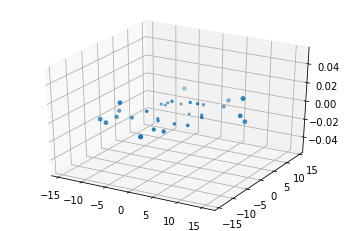

In [322]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.scatter(dfPlanet['x'], dfPlanet['y'], dfPlanet['z'])

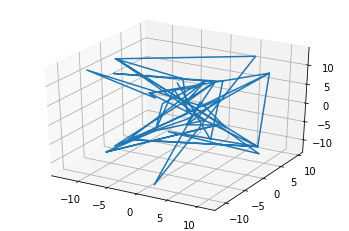

In [323]:
world = Map(50,dfPlanet['x'],dfPlanet['y'],dfPlanet['z'])
t = Tour(world)
t2 = t.clone()
t3 = t.clone()
t.plot()

In [324]:
descent(t2)

488.4795573851444
437.6326811758659
393.15243968904923
361.38153534801745
332.2398857497082
313.7843192777929
298.95623104565664
283.2761034417755
268.67529497414927
254.4217275458036
243.3973714232627
233.61069491961675
226.5690721093685
219.6042701181155
214.09298871163048
206.66170076630885
201.5664711354258
193.55179084265026
183.29940878953795
176.2492876749954
169.40793933278758
164.86641881788552
161.12147196969164
157.39335379583332
154.97418741580913
153.07338221069705
150.93793177168635
149.15987281669499
145.36951397941448
141.63414646076916
140.10119099687466
138.62862519598852
137.16139673557055
136.01107118136937
135.19633697503124
134.55406184852563
134.13686035198245
134.12082428707572
134.11594585145835
134.11247805501733
134.11194065446892


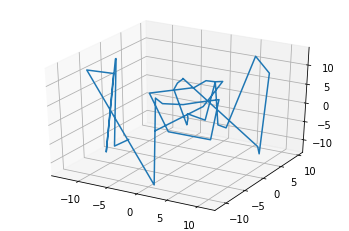

In [325]:
t2.plot()

In [326]:
annealing(t3, 5000, 0.999, 0.00001)

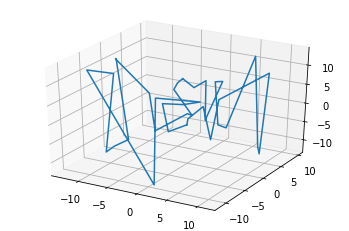

In [327]:
t3.plot()

In [331]:
t3.distance()

107.31284151905214

In [328]:
psize = 200
size = 50
iter = 100
mutation_rate = 0.15

population = []
for p in range(psize):
    population.append(Tour(world))

In [329]:
b, pop = evoalg(population, iter)

0 434.05886343091004 495.01604902578737
1 411.62081055386807 489.96722386927803
2 395.90615724809544 485.12798402073065
3 412.82214170651366 479.54733475526444
4 391.10317871783894 479.85440017886447
5 397.1373229286629 476.9984815335484
6 386.331202422107 474.8676795878839
7 386.331202422107 466.3039599200858
8 384.3187022346456 455.3335070838951
9 379.13710103672275 450.5930379842384
10 357.41398507064656 447.0537026946569
11 349.4354427660345 442.99056020696787
12 356.89560751672826 436.1866210383781
13 346.90733283002334 429.83833867941246
14 368.4312666943354 426.6742191767227
15 371.3851718249563 427.72748147912307
16 348.96597206621703 423.16259763430696
17 345.26484001741306 416.4151681949024
18 339.3243123762312 409.8990558212722
19 339.3243123762312 401.4603199776188
20 337.70289505965707 393.2921833296234
21 332.99851088053447 386.7339022777714
22 317.6468233597822 384.18423397567886
23 319.5160470621332 379.03076353210776
24 325.3476205533946 373.280590303869
25 308.6631655

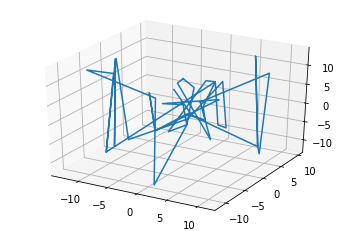

In [330]:
pop[2].plot()

In [334]:
pop[2].distance()

205.0519393460271

## Reflection:

Because I didn't want to overcomplicate the process of scraping the data from the wikipedia page I input all the values I needed from the wikipedia manually into my own csv file. It took quite awhile but because the wikipedia page was in a similar format as a excel sheet it ended up working out nicely and made it really easy to parse through the data in the file later on when creating my variables. When getting the decimal values for all of my variables it wasn't too difficult, all of the digit characters were put in specific places in the strings of my values so I was able to consistently get the values I wanted out of my dataset by just using substrings and converting to float. To then get the decimal values for my variables, for distance I got the substring of the numbers up to the ± character, for Right Ascension I took my substrings and converted my minutes and seconds values to hours and added to hours, and lastly for Declination I effectively did the same thing that I did with Right Ascension. Then Using those values I calculated the x,y,z coordinates and added them to a csv file in order to plot them. 

In terms of assumptions needed to solve this problem we are assuming a lot about the spaceship itself, such as never straying off course from its set path even a litte bit, never needing to refuel, and actually having a spaceship that can trek this insane distance without breaking down or killing everyone piloting it. We are assuming a perfect flight.

Based off the distance given from my functions and the speed of the spaceship, using the best distance of 107.3 parsecs at half the speed of light gives us 338.2 lightyears, meaning that it would take the enormous time of 676.4  years in order to fully complete this journey across space. It could potentially be shortened however this journey will always take a tremendously long time given the distance and speeds we're working with even if it was the most optimal path.